In [1]:
import numpy as np
from figaro.mixture import DPGMM
from figaro.plot import plot_median_cr
from figaro.utils import get_priors
from figaro.load import save_density
from tqdm import tqdm

In [2]:
data_double_gaussian = np.loadtxt('/Users/thomas.ng/Documents/GitHub/population_analysis/H0_test/double_gaussian/data/double_gaussian.txt')

In [3]:
M_min = 0
M_max = 200
n_draws = 200

mix_double_gaussian = DPGMM([[M_min, M_max]], prior_pars=get_priors([[M_min, M_max]], data_double_gaussian))
draws_double_gaussian = np.array([mix_double_gaussian.density_from_samples(data_double_gaussian) for _ in tqdm(range(n_draws))])

100%|██████████| 200/200 [01:51<00:00,  1.79it/s]


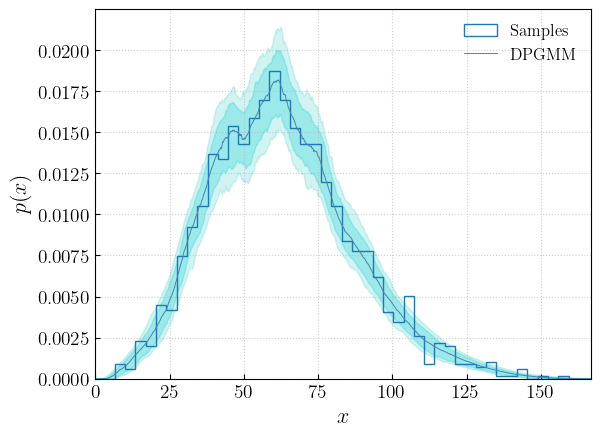

In [5]:
save_density(draws_double_gaussian)
plot_median_cr(draws_double_gaussian, samples=data_double_gaussian, save=True, show=False)